### Import Relevant Libraries

In [131]:
import numpy as np
import pandas as pd
import random
%matplotlib inline

### Create S&P returns dataframe binned at 1% intervals from -50% to +50%

In [132]:
sp = pd.read_csv(r'sp-500-historical-annual-returns.csv')
bucket_array = np.linspace(-50, 50, 101)
sp['bucket'] = pd.cut(sp['value'], bucket_array)
sp = sp.groupby(['bucket'])[['value']].count()
sp['probability'] = sp['value']/sp['value'].sum()
sp.reset_index(inplace=True)
sp.rename(index=str, columns={"value": "count"}, inplace=True)

In [135]:
def get_sp_return(ser):
    bucket_choice = np.random.choice(len(ser), 1, p=ser['probability'])
    left, right = ser.iloc[bucket_choice]['bucket'][0].left, ser.iloc[bucket_choice]['bucket'][0].right
    return random.uniform(left, right)

In [136]:
data = []
for i in range(1000):
    data.append({'return':get_sp_return(sp)})

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DE6CF57208>]],
      dtype=object)

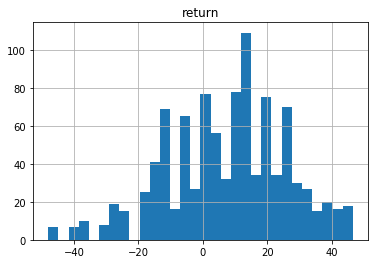

In [137]:
pd.DataFrame(data).hist(bins=30)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DE6CF80AC8>]],
      dtype=object)

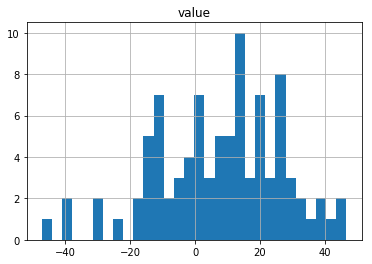

In [138]:
pd.read_csv(r'sp-500-historical-annual-returns.csv').hist(bins=30)

In [169]:
housing = pd.read_csv(r'montreal-historical-housing-index.csv', usecols=[0, 1], index_col='Date', parse_dates=True)
housing = housing.resample(rule='A').max()
housing['return'] = housing['Composite_HPI'].pct_change().fillna(106.3/100-1)*100
bucket_array = np.linspace(0, 10, 11)
housing['bucket'] = pd.cut(housing['return'], bucket_array)
housing = housing.groupby(['bucket'])[['return']].count()
housing['probability'] = housing['return']/housing['return'].sum()
housing.reset_index(inplace=True)
housing.rename(index=str, columns={"return": "count"}, inplace=True)
housing

,bucket,count,probability
0,"(0.0, 1.0]",1,0.066667
1,"(1.0, 2.0]",1,0.066667
2,"(2.0, 3.0]",3,0.200000
3,"(3.0, 4.0]",3,0.200000
4,"(4.0, 5.0]",0,0.000000
5,"(5.0, 6.0]",1,0.066667
6,"(6.0, 7.0]",5,0.333333
7,"(7.0, 8.0]",1,0.066667
8,"(8.0, 9.0]",0,0.000000
9,"(9.0, 10.0]",0,0.000000


In [176]:
data = []
for i in range(1000):
    data.append({'return':get_sp_return(housing)})

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DE6D2A6AC8>]],
      dtype=object)

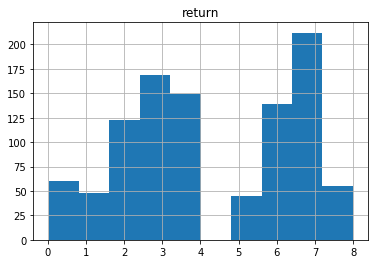

In [177]:
pd.DataFrame(data).hist(bins=10)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DE6D23EC18>]],
      dtype=object)

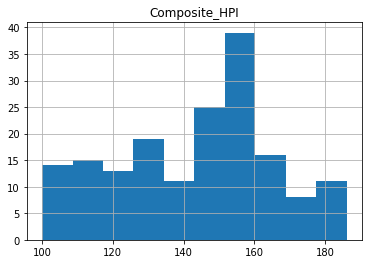

In [175]:
pd.read_csv(r'montreal-historical-housing-index.csv', usecols=[0, 1], index_col='Date', parse_dates=True).hist(bins=10)